# MNIST Digit Classification
This notebook will focus on analyzing and classifying digits from the MNIST digit dataset. This notebook provides a complete data science workflow that covers all the necessary steps, from data exploration to deployment. <br>
## Table of Contents
1. [Framing and Description of the Problem](#Framing-and-Description-of-the-Problem)
2. [Obtaining the Data](#Obtaining-the-Data)
3. [Exploring the Data](#Exploring-the-Data)
4. [Data Preprocessing](#Data-Preprocessing)
5. [Model Training and Selection](#Model-Training-and-Selection)
6. [Model fine-tuning](#Model-fine-tuning)
7. [Save the model](#Save-the-model)

# Framing and Description of the Problem
The MNIST dataset contains features of 28x28 digit images and our goal is to predict which digit we are looking at. From this information we can conclude that this is a classification problem that requires only numerical preprocessing.

# Obtaining the Data
We can use sklearn's `fetch_openml` method from `sklearn.datasets` to fetch the dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

C:\Users\Nifdi Guliyev\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Exploring the Data

In [2]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [3]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
X, y = mnist.data, mnist.target

In [6]:
X.shape

(70000, 784)

There are 70,000 images, and each image has 784 features. This is
because each image is 28 × 28 pixels, and each feature simply
represents one pixel’s intensity, from 0 (white) to 255 (black). All we need to do is grab
an instance’s feature vector, reshape it to a 28 × 28 array, and display it
using Matplotlib’s `imshow`() function. We use `cmap="binary"` to get a
grayscale color map where 0 is white and 255 is black

In [7]:
import matplotlib.pyplot as plt

def img_plot(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

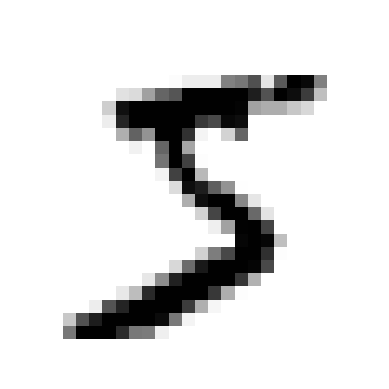

In [8]:
digit = X[0]
img_plot(digit)
plt.show()

# Data Preprocessing
There is not much data pre-processing involved since the dataset is clean an contains only features of the images.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X.astype("float64"))

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Feature values of images range from 0(black) to 255(white) and we can scale them to 0 and 1 to make the model work faster. Clearly, our upper and lower bounds are known and the data does not follow a normal distribution; therefore we will be using `MinMaxScaler`.

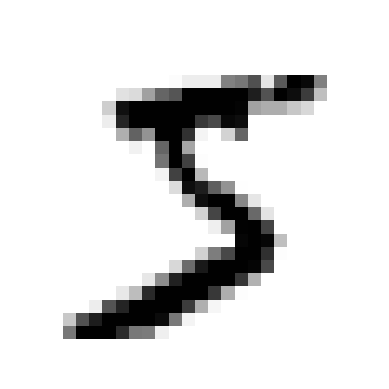

In [17]:
img_plot(X_train[0])

In [18]:
X_train[0].max()

1.0

# Model Training and Selection

Scikit-Learn detects when you try to use a binary classification algorithm
for a multiclass classification task, and it automatically runs One-versus-Rest(OvR) or One-versus-One (OvO),
depending on the algorithm. Let’s try this with a support vector machine
classifier using the `sklearn.svm.SVC` class.

In [23]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [24]:
some_digits_scores = svm_classifier.decision_function([X_train[0]])
some_digits_scores.round(2) # The highest score is 9.31, and it’s indeed the one corresponding to class 5

array([[ 1.73,  2.73,  7.25,  8.31, -0.31,  9.31,  1.71,  2.77,  6.23,
         4.85]])

In [25]:
some_digits_scores.argmax()

5

In [26]:
from sklearn.model_selection import cross_val_score

cross_val_score(svm_classifier, X_train, y_train, cv=3, scoring="accuracy")

array([0.977  , 0.97375, 0.9739 ])

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9688

# Model fine-tuning

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3,4,5,6,7,8]}]

knn_classifier = KNeighborsClassifier()
grid_cv = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_cv.fit(X_train, y_train)

grid_cv.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [34]:
print(y_test[450])
grid_cv.predict([X_test[450]])

3


array(['3'], dtype=object)

In [31]:
grid_cv.best_score_

0.9716333333333335

In [36]:
from sklearn.pipeline import make_pipeline

final_model = make_pipeline(MinMaxScaler(), grid_cv)

In [39]:
final_model.fit(X_train, y_train)

AttributeError: 'Pipeline' object has no attribute 'best_params_'

In [43]:
print(y_test[450])
final_model.predict([X_test[450]])

3


array(['3'], dtype=object)

# Save the model

In [49]:
import joblib

joblib.dump(final_model, "models/digit_classifier.pkl")

['models/digit_classifier.pkl']

In [47]:
final_model_reloaded = joblib.load("digit_classifier.pkl")

index = 0
pred = final_model_reloaded.predict(X_test)
print(f"Predicted value: {pred[index]}")
print(f"Actual value: {y_test[index]}")

Predicted value: 7
Actual value: 7
